In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

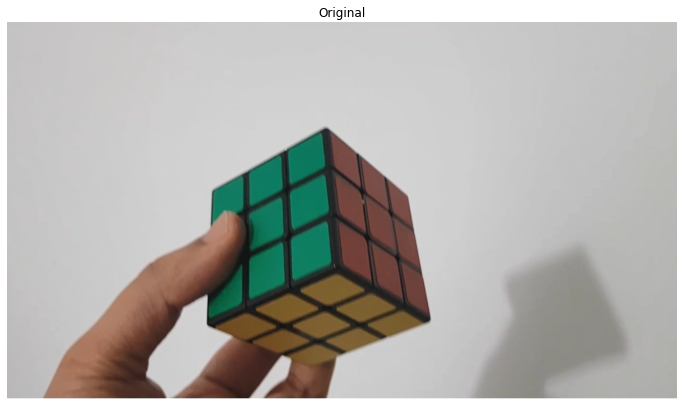

In [30]:
img = cv2.imread('rubiks_still.png')
img = rgb(img)
disp(img, 'Original', s=12)

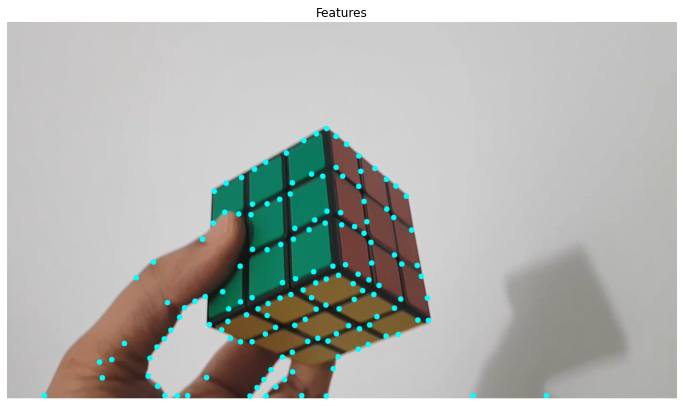

In [67]:

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# disp(img_gray, 'Gray', s=12)

# params for ShiTomasi corner detection
feature_params = dict(  maxCorners = 200,
                        qualityLevel = 0.01,
                        minDistance = 30,
                        blockSize = 16,)
points = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)

# plot points on the image
img_drawn = img.copy()
for p in points:
    x,y = p.ravel()
    cv2.circle(img_drawn, (int(x),int(y)), 8, (0,255,255), -1)

disp(img_drawn, 'Features', s=12)